# Part 2
## Setting up the website
In the previous part we created a basic web server that we can continue to build on.
In our web form we want to do a few things.

## Adding Content
We want to build some code for the site to display the site
We head off to http://oswd.org to download a theme
We've found one called bluefreedom, with this http://static.oswd.org/designs/3682/bluefreedom3.zip

In [1]:
# Lets actually download the file
wget http://static.oswd.org/designs/3682/bluefreedom3.zip

--2017-03-12 12:18:53--  http://static.oswd.org/designs/3682/bluefreedom3.zip
Resolving static.oswd.org... 52.84.63.173, 52.84.63.105, 52.84.63.20, ...
Connecting to static.oswd.org|52.84.63.173|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13412 (13K) [application/zip]
Saving to: 'bluefreedom3.zip'

bluefreedom3.zip    100%[===================>]  13.10K  --.-KB/s    in 0.05s   

2017-03-12 12:18:54 (270 KB/s) - 'bluefreedom3.zip' saved [13412/13412]



### Setting up directory
We now want to create a directory to store all our stuff

In [14]:
unzip bluefreedom3.zip

Archive:  bluefreedom3.zip
   creating: bluefreedom3/images/
  inflating: bluefreedom3/images/bott.jpg  
  inflating: bluefreedom3/images/hidr.jpg  
  inflating: bluefreedom3/images/midd.jpg  
  inflating: bluefreedom3/images/minimal.jpg  
  inflating: bluefreedom3/images/topp.jpg  
  inflating: bluefreedom3/index.html  
  inflating: bluefreedom3/style.css  


In [17]:
mv bluefreedom3 dockerwww

In [18]:
ls dockerwww

images		index.html	style.css


### Building container
Perfect, we now have all the files, so now we can build our web server

In [19]:
docker images

REPOSITORY          TAG                 IMAGE ID            CREATED             SIZE
centos6             baseweb             34079efab3e4        20 minutes ago      373 MB
centos              centos6             8315978ceaaa        4 months ago        195 MB


**We can see we have our container baseweb that we can create a container to share our site with**

### Run Container
We want to run a container with the name baseweb. We'll deattach to run any commands with docker exec.

In [24]:
docker run --name=webtest -d -i -t centos6:baseweb /bin/bash

2360c8d7973856349de779fd0da6f5591f116b6225d2c622cd2fb3e9e37ecd06


In [25]:
docker ps 

CONTAINER ID        IMAGE               COMMAND             CREATED             STATUS              PORTS               NAMES
2360c8d79738        centos6:baseweb     "/bin/bash"         7 seconds ago       Up 6 seconds                            webtest


**Awesome - our containter is now running. Let's check the logs**

In [26]:
docker logs webtest

Starting httpd: httpd: Could not reliably determine the server's fully qualified domain name, using 172.17.0.2 for ServerName
[  OK  ]
Generating SSH2 RSA host key: [  OK  ]
Generating SSH1 RSA host key: [  OK  ]
Generating SSH2 DSA host key: [  OK  ]
Starting sshd: [  OK  ]


**Everything looks good**, and it gives us the IP address which is 172.17.0.2

## Mounting the folder
The problem is that we don't have anything to serve... 
We can check this by running `df -h`

In [27]:
docker exec webtest df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          63G  1.7G   58G   3% /
tmpfs          1000M     0 1000M   0% /dev
tmpfs          1000M     0 1000M   0% /sys/fs/cgroup
/dev/vda1        63G  1.7G   58G   3% /etc/resolv.conf
/dev/vda1        63G  1.7G   58G   3% /etc/hostname
/dev/vda1        63G  1.7G   58G   3% /etc/hosts
shm              64M     0   64M   0% /dev/shm
tmpfs          1000M     0 1000M   0% /proc/kcore
tmpfs          1000M     0 1000M   0% /proc/timer_list
tmpfs          1000M     0 1000M   0% /proc/sched_debug
tmpfs          1000M     0 1000M   0% /sys/firmware


In [28]:
# We can check what's inside the default apache server folder
docker exec webtest bash -c "cd /var/www/html; ls"

**Indeed! There's nothing... so it won't serve any content**

### Fix it!
So we are going to fix this. we'll remove the container and rebuild..

In [30]:
docker rm webtest -f

webtest


** This time we will attach the volume into the container so that it has the html files**

In [32]:
docker run -p 8080:80 --name=webtest -v $(pwd)/dockerwww:/var/www/html -d -i -t centos6:baseweb /bin/bash

a331f509b999c412d7906d4c40304d26a0e2fd27b50133602dbf42f59ffae030


In [33]:
docker logs webtest

Starting httpd: httpd: Could not reliably determine the server's fully qualified domain name, using 172.17.0.2 for ServerName
[  OK  ]
Generating SSH2 RSA host key: [  OK  ]
Generating SSH1 RSA host key: [  OK  ]
Generating SSH2 DSA host key: [  OK  ]
Starting sshd: [  OK  ]


**Given that we mapped a port 8080:80, we can check it out by visiting http://localhost:8080!**

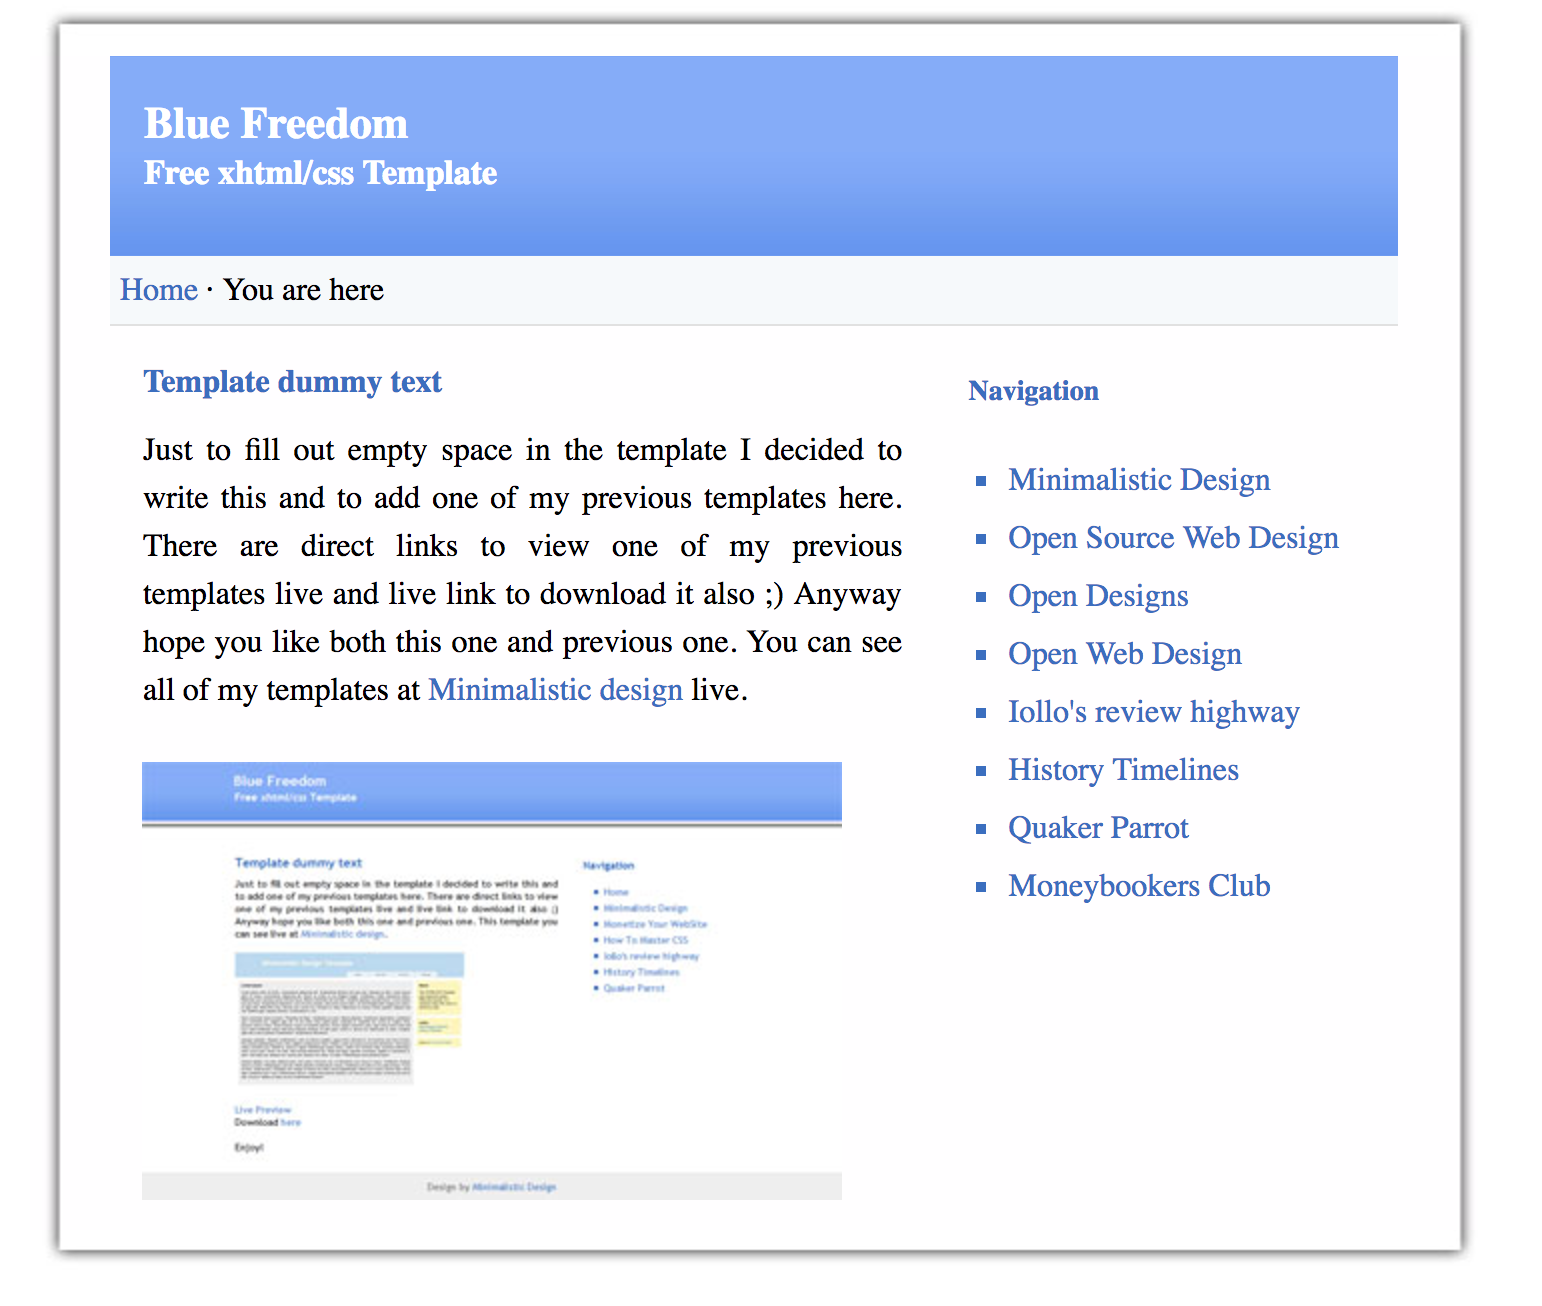

In [2]:
display < img/website1.png

### Making changes
We could just make chagnes in the container, so we could just make changes to our underlying directory, making changes directly on that. (dockerwww).

We can add a git repo on our ./dockerww folder to keep everything tidy, etc